# Homework 4: Data Visualization
- **Name**:  Sumanth Dadi
- **UB Username**: sdadi

- **UB Person Number**:  50541131

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

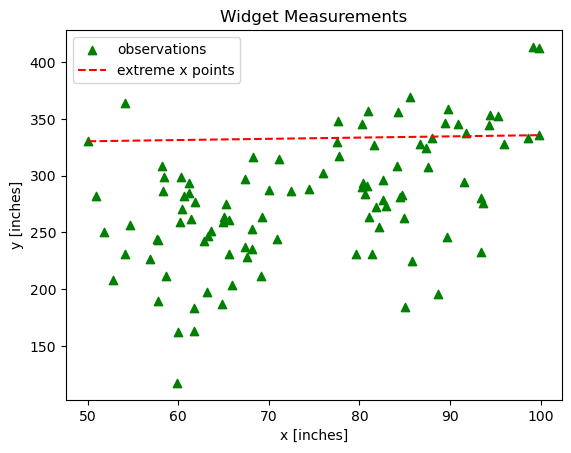

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the CSV file and skip lines starting with '%'
data = pd.read_csv("scatter_data.csv", comment="%", delimiter="\t", header=None)

# Remove the column names and reset the index
data = data[0].str.split(',', expand=True)
data.columns = ["x", "y"]

# Convert the "x" and "y" columns to numeric (in case they are read as strings)
data["x"] = pd.to_numeric(data["x"])
data["y"] = pd.to_numeric(data["y"])

# Create a scatter plot with green triangles
plt.scatter(data["x"], data["y"], marker="^", color="green", label="observations")

# Calculate the minimum and maximum x-values
min_x = data["x"].min()
max_x = data["x"].max()

# Find the corresponding y-values for the left-most and right-most points
y_min_x = data.loc[data["x"] == min_x, "y"].values[0]
y_max_x = data.loc[data["x"] == max_x, "y"].values[0]

# Create a red dashed line from the left-most point to the right-most point
plt.plot([min_x, max_x], [y_min_x, y_max_x], color="red", linestyle="--", label="extreme x points")

# Set plot title and axis labels
plt.title("Widget Measurements")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Problem 2 - Histogram

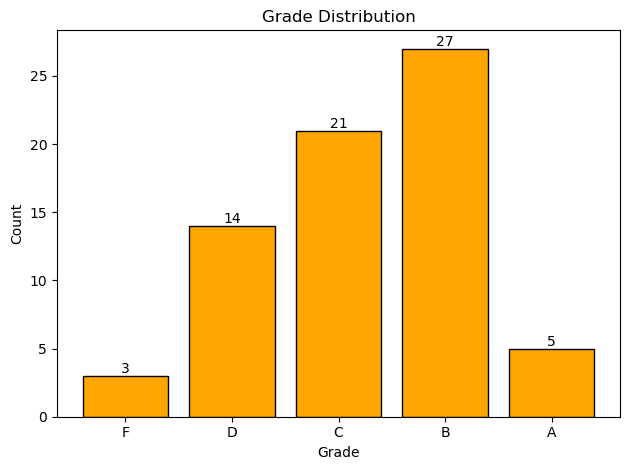

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('student_grades.csv', comment='%')
data.columns = ["studentID", "avgScore"]
data["avgScore"] = pd.to_numeric(data["avgScore"], errors="coerce")  
bins = [0, 60, 70, 80, 90, 100]
labels = ["F", "D", "C", "B", "A"]

data['Grade'] = pd.cut(data['avgScore'], bins=bins, labels=labels, include_lowest=True)
grade_counts = data['Grade'].value_counts().reindex(labels, fill_value=0)
positions = np.arange(len(labels))

plt.bar(positions, grade_counts, align='center', color='orange', edgecolor='black')

for i, count in enumerate(grade_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(positions, labels)
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

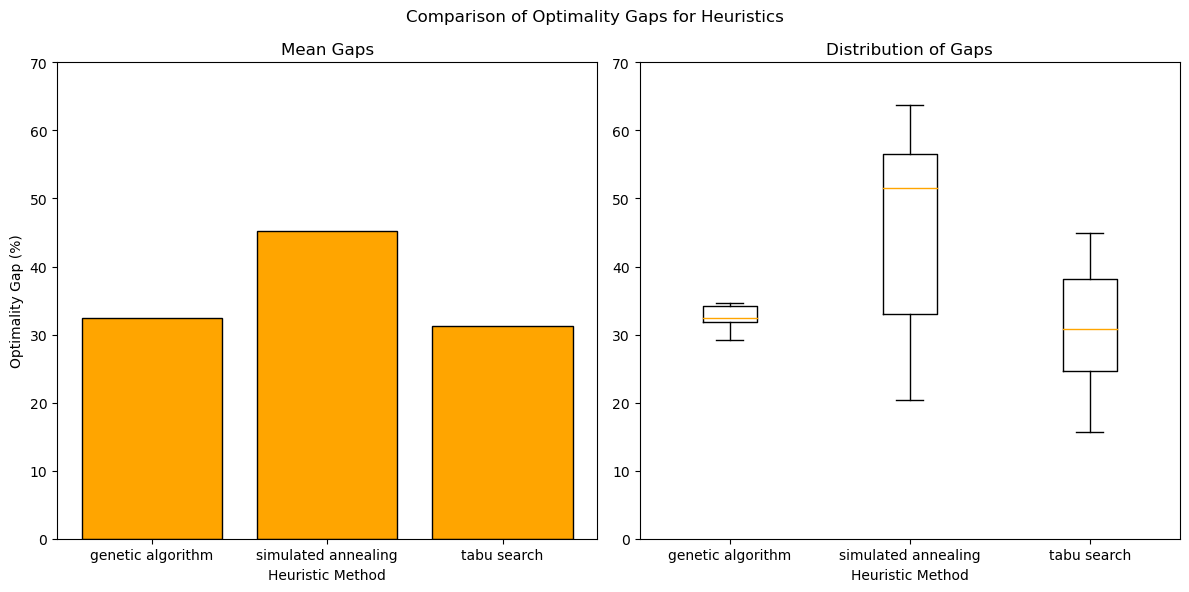

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file, ignoring lines that start with '%'
data = pd.read_csv("solution_data.csv", comment="%", header=None)
data.columns = ["Problem", "SolnMethod", "Value"]

# Calculate the optimality gaps for each heuristic
optimal_values = data[data['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()
heuristic_values = data[data['SolnMethod'] != 'optimal'].groupby(['Problem', 'SolnMethod'])['Value'].mean()
optimality_gaps = (optimal_values - heuristic_values) / optimal_values * 100

# Reset the index of the Series
optimality_gaps = optimality_gaps.reset_index()

# Create a DataFrame for the bar plot
barplot_data = pd.DataFrame({
    'Heuristic': optimality_gaps['SolnMethod'],
    'Optimality Gap': optimality_gaps['Value']
})

# Get the average optimality gaps for specific heuristics
optimality_gaps = optimality_gaps.reset_index()
average_gaps = barplot_data[barplot_data['Heuristic'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

# First subplot: Barplot of average optimality gaps
axes[0].bar(average_gaps['Heuristic'], average_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")
axes[0].set_ylim([0, 70])
# Second subplot: Boxplot of spread of optimality gaps
data_boxplot = [optimality_gaps[optimality_gaps['SolnMethod'] == method]['Value'] for method in optimality_gaps['SolnMethod'].unique()]

# Create the boxplot
bp = axes[1].boxplot(data_boxplot, labels=optimality_gaps['SolnMethod'].unique(), patch_artist=False, medianprops={'color': 'orange'})

# Set custom labels and positions for the x-axis ticks
custom_labels = optimality_gaps['SolnMethod'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Distribution of Gaps")
axes[1].set_ylim([0, 70])
axes[1].set_ylim(axes[0].get_ylim())
# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()


--- 
## Part 2 - Explore New Plot Types

The plot you are about to create is a line plot that shows the change in Gross Domestic Product (GDP) per Capita over time for various countries. Each line on the plot represents a different country, and the x-axis represents the years. The y-axis represents the GDP per Capita in current US dollars.

The use of a line plot is appropriate in this context because it allows you to visualize the trends and changes in GDP per Capita for multiple countries over time. It is a useful choice for time series data, as it helps to identify patterns, trends, and variations in GDP per Capita for different countries.

The plot uses the Seaborn library for data visualization, which provides an aesthetically pleasing and informative way to display the data. Each country is represented by a distinct color, making it easy to distinguish and compare the GDP per Capita trends over the years. The legend is placed outside the plot for clarity and ease of reading, indicating the country each line corresponds to.

This plot will help viewers understand how the GDP per Capita has evolved over time for a selected group of countries and identify any interesting patterns or disparities in economic growth among them.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/wide_data_lineplot.html
- **URL of Sample Data**:  https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 

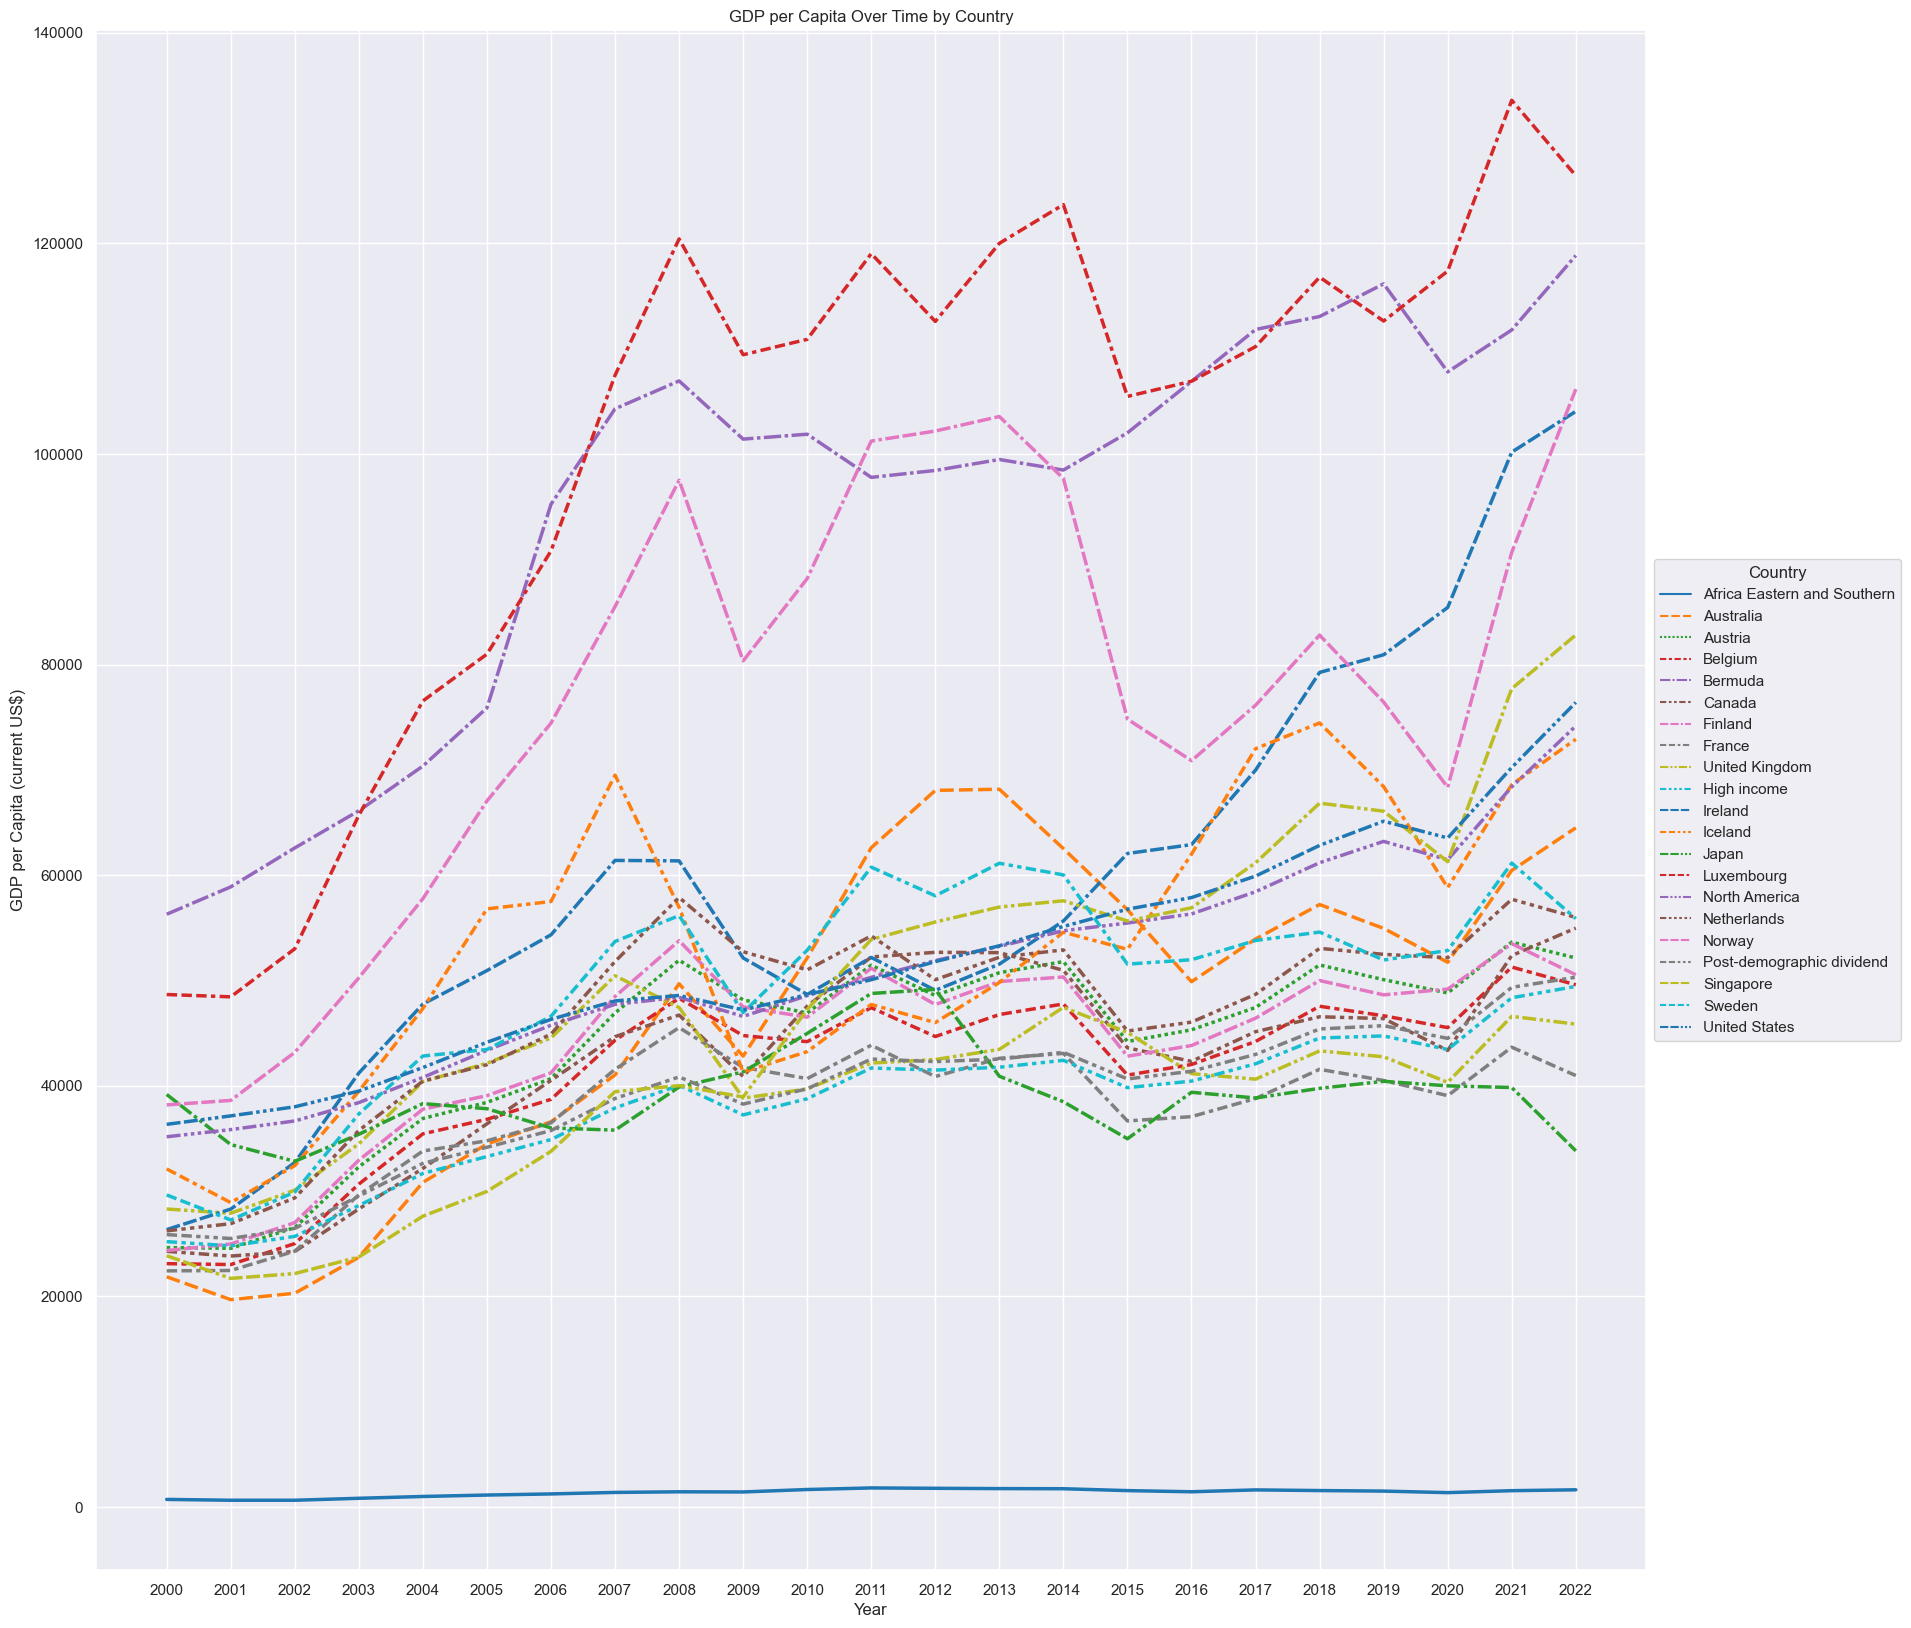

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the GDP per capita data from a CSV file into a Pandas DataFrame
data = pd.read_csv("GDP per capita.csv")

# List of columns to remove from the DataFrame
columns_to_remove = ["Country Code", "Indicator Name", "Indicator Code"]

# Drop the specified columns from the DataFrame
data.drop(columns=columns_to_remove, axis=1, inplace=True)

# Transpose the DataFrame to have years as rows and countries as columns
data = data.transpose()

# Remove any columns (years) with missing values (NaN)
data.dropna(axis=1, how='any', inplace=True)

# Calculate the average GDP per capita for each year (column)
average_GDP_per_capita = data.iloc[1:, 1:].mean()

# Identify columns (years) where the average GDP per capita is less than 20,000
columns_to_remove = average_GDP_per_capita[average_GDP_per_capita < 20000].index

# Remove columns (years) with average GDP per capita below 20,000
data.drop(columns=columns_to_remove, inplace=True)

# Transpose the DataFrame back to its original form
data = data.transpose()

# Set the index of the DataFrame to "Country Name" column
data.set_index('Country Name', inplace=True)

# Transpose the DataFrame once more
data = data.transpose()

# Select a subset of data starting from the 41st row (skipping the first 40 rows)
data = data.iloc[40:]

# Display the first few rows of the processed DataFrame
data.head()
# Set the style for Seaborn (optional)
sns.set_theme(style="darkgrid")

# Create the line plot
plt.figure(figsize=(20, 20))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

# Set labels and title
plt.xlabel("Year")
plt.ylabel("GDP per Capita (current US$)")
plt.title("GDP per Capita Over Time by Country")

# Show the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Country")

# Show the plot
plt.show()


[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 